In [ ]:
# 정리 해야 할 것
"""
requrienment.txt
test 를 train 에 합칠지 말지
test_.csv 도 자동으로 해야 할 것인가. 왜냐면 내가 그냥 넣었거든
pretrain model 파일 저장 아직
import glob from glob 하면 충돌하는게 있다.
"""

'\nrequrienment.txt\ntest 를 train 에 합칠지 말지\ntest_.csv 도 자동으로 해야 할 것인가. 왜냐면 내가 그냥 넣었거든\npretrain model 파일 저장 아직\nimport glob from glob 하면 충돌하는게 있다.\n'

# 데이터 전처리

## 데이터 다운로드

In [ ]:
import os
from zipfile import ZipFile
from glob import glob 
import pandas as pd 

# 포디 데이터 다운로드
!gdown "1LmtwbBi_Vw8OoOcUzqddYBwZc_W5kpQU&confirm=t" 

# pretrained model 다운로드
!gdown "1mOWGMMkrOHynDGtHsYQmpaCSKwUfB6gB&confirm=t" 

# 현욱 깃헙에서 .py 파일 다운로드
!git clone https://github.com/ugiugi0823/DACON-4D.git

# 배경 제거한 데이터 셋 다운
!gdown "11gM32erRmxLNWSq4EK2P2fOmQgGIe9YG&confirm=t"


# 필요한 설치 하기!
!pip install efficientnet-pytorch
!pip install warmup-scheduler
!pip install Augmentor
!pip install rembg[gpu]
!pip install ttach




dir = '/content/'

# 실제로 알집이 풀어질 경로
base_dir = '/content/DACON-4D/dataset/'
base_dir_1 = '/content/DACON-4D/'

# os.chdir(base_dir)

# 알집을 풀어볼까용?
ZipFile(dir + '4d_data.zip').extractall(base_dir)
ZipFile(dir + 'train_sub_bgr.zip').extractall(base_dir)
ZipFile(dir + 'pretrained_model.zip').extractall(base_dir_1)


# 실제로 잘 풀렸는지 확인

os.listdir(base_dir)


Downloading...
From: https://drive.google.com/uc?id=1LmtwbBi_Vw8OoOcUzqddYBwZc_W5kpQU&confirm=t
To: /content/4d_data.zip
100% 754M/754M [00:03<00:00, 207MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mOWGMMkrOHynDGtHsYQmpaCSKwUfB6gB&confirm=t
To: /content/pretrained_model.zip
100% 207M/207M [00:03<00:00, 52.7MB/s]
Cloning into 'DACON-4D'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 256 (delta 76), reused 16 (delta 16), pack-reused 142
Receiving objects: 100% (256/256), 486.90 KiB | 12.81 MiB/s, done.
Resolving deltas: 100% (138/138), done.
Downloading...
From: https://drive.google.com/uc?id=11gM32erRmxLNWSq4EK2P2fOmQgGIe9YG&confirm=t
To: /content/train_sub_bgr.zip
100% 2.14G/2.14G [00:18<00:00, 115MB/s] 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for effic

['train.csv',
 'sample_submission.csv',
 '__init__.py',
 'test',
 'train',
 'train_sub_bgr',
 'test.csv',
 'test_.csv',
 'train_new',
 'background']

In [ ]:

# import os
# os.kill(os.getpid(), 9)

## 만약에 배경이미지를 제거 하고 싶다면!
- Remove images background using by rembg[gpu]
- [What is rembg](https://github.com/danielgatis/rembg)

In [ ]:
%cd /content/DACON-4D/dataset

In [ ]:
!pip install rembg[gpu]

In [ ]:
# !rembg p inpupt_path output_path 
'''
It takes a long time.!!
'''

!rembg p train train_new

## 내가 찍은 사진과 포디블록 합치는 구간!

In [ ]:
%cd /content/DACON-4D/dataset

/content/DACON-4D/dataset


In [ ]:
from glob import glob 

img_paths = glob("train_sub_bgr/*.png")
bgr_paths = glob("background/*.jpg")

print(f"샘플수 :{len(img_paths)}")
print(f"샘플수 :{len(bgr_paths)}")

샘플수 :32994
샘플수 :1


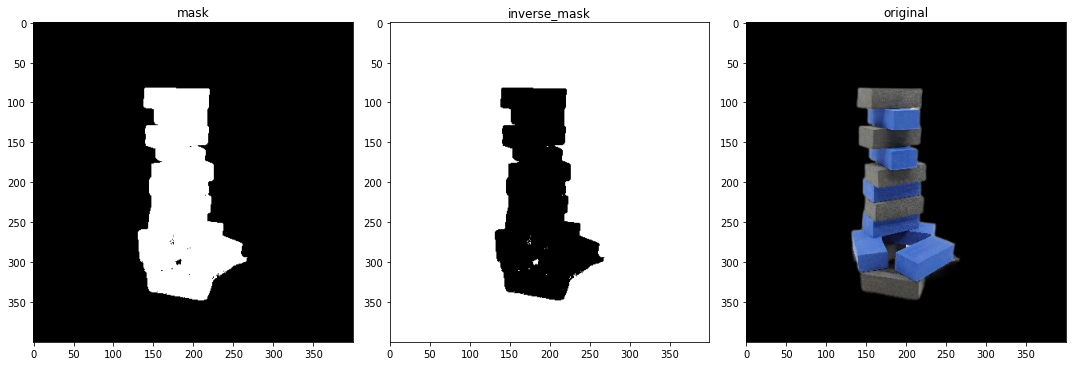

In [ ]:
import matplotlib.pyplot as plt
import os 
from glob import glob 
import cv2
import random 

img_path =img_paths[3]
img  =cv2.imread(img_path)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY)


mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
mask_inv = cv2.bitwise_not(mask) #cv랑 pyplot은 색깔 포맷이 다름 

plt.figure( figsize= (15,15))
plt.subplot(131)
plt.imshow(mask)
plt.title("mask")
plt.subplot(132)
plt.imshow(mask_inv)
plt.title("inverse_mask")
plt.subplot(133)
plt.imshow(img)
plt.title("original")
plt.tight_layout()

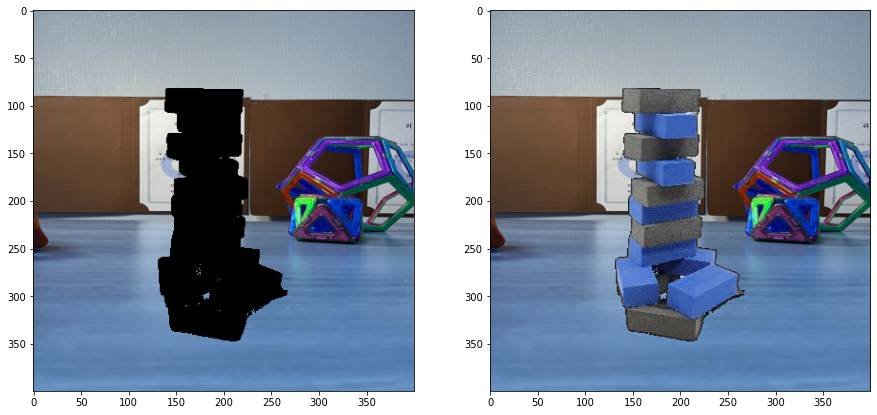

In [ ]:
bgr1 =cv2.imread(bgr_paths[0],1)
bgr1 = cv2.resize(bgr1, (400,400), interpolation = cv2.INTER_AREA )



bgr_masked =cv2.bitwise_and(bgr1,mask_inv)

dst =cv2.bitwise_or(img, bgr_masked)
plt.figure( figsize= (15,15))
plt.subplot(121)
plt.imshow(bgr_masked)
plt.subplot(122) 
plt.imshow(cv2.bitwise_or(dst,img))

In [ ]:
save_dir ="train_new"
def get_bgr(img_path, bgr_path, save_dir):
    
    img  =cv2.imread(img_path)
    bgr = cv2.imread(bgr_path)
    bgr = cv2.resize(bgr, (400,400), interpolation = cv2.INTER_AREA )

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY)
    mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    mask_inv = cv2.bitwise_not(mask) 

    bgr_masked =cv2.bitwise_and(bgr,mask_inv)
    dst =cv2.bitwise_or(img, bgr_masked)
    result = cv2.bitwise_or(dst,img)

    cv2.imwrite(save_dir +"/"+ img_path.split("/")[-1].split(".")[0]+".jpg", result)

In [ ]:
from tqdm.auto import tqdm

for img_path in tqdm(img_paths): 
    for bgr_path in bgr_paths:
       get_bgr(img_path, bgr_path, save_dir)

  0%|          | 0/32994 [00:00<?, ?it/s]

In [ ]:
from glob import glob 

img_paths = glob("train_sub_bgr/*.png")
bgr_paths = glob("background/*.jpg")
new_paths = glob("train_new/*.jpg")

print(f"샘플수 :{len(img_paths)}")
print(f"샘플수 :{len(bgr_paths)}")
print(f"샘플수 :{len(new_paths)}")

샘플수 :32994
샘플수 :1
샘플수 :32994


In [ ]:
new_paths[0]

'train_new/TRAIN_08650.jpg'

## test set 이름 변경

In [ ]:
%cd /content/DACON-4D/dataset/test

/content/DACON-4D/dataset/test


In [ ]:
import glob
input_list_test = glob.glob("./*.jpg")
input_list_test[0]

'./TEST_01042.jpg'

In [ ]:

t = glob.glob("./*.jpg")
t = t[0]
t = t.split('_')[1].split('.')[0]

print(t)
# print(type(t))
# int(t)

01042


In [ ]:


# 무조건 해당 경로에서 진행해야 해!
%cd /content/DACON-4D/dataset/test
for i, file in enumerate(input_list_test):
    old = file
    ind = file.split('_')[1].split('.')[0]
    new = ind +".jpg" # 00000 + .jpg >> 요기서 
    print(old +'==>' + new)
    os.rename(old,new)

/content/DACON-4D/dataset/test
./TEST_01042.jpg==>01042.jpg
./TEST_01350.jpg==>01350.jpg
./TEST_01426.jpg==>01426.jpg
./TEST_01437.jpg==>01437.jpg
./TEST_00274.jpg==>00274.jpg
./TEST_00562.jpg==>00562.jpg
./TEST_00544.jpg==>00544.jpg
./TEST_00303.jpg==>00303.jpg
./TEST_00902.jpg==>00902.jpg
./TEST_00575.jpg==>00575.jpg
./TEST_00389.jpg==>00389.jpg
./TEST_00269.jpg==>00269.jpg
./TEST_00291.jpg==>00291.jpg
./TEST_00682.jpg==>00682.jpg
./TEST_01049.jpg==>01049.jpg
./TEST_00656.jpg==>00656.jpg
./TEST_00068.jpg==>00068.jpg
./TEST_00844.jpg==>00844.jpg
./TEST_00783.jpg==>00783.jpg
./TEST_00232.jpg==>00232.jpg
./TEST_01022.jpg==>01022.jpg
./TEST_00744.jpg==>00744.jpg
./TEST_00283.jpg==>00283.jpg
./TEST_01202.jpg==>01202.jpg
./TEST_00967.jpg==>00967.jpg
./TEST_00546.jpg==>00546.jpg
./TEST_00764.jpg==>00764.jpg
./TEST_00992.jpg==>00992.jpg
./TEST_00479.jpg==>00479.jpg
./TEST_00678.jpg==>00678.jpg
./TEST_00469.jpg==>00469.jpg
./TEST_01050.jpg==>01050.jpg
./TEST_01262.jpg==>01262.jpg
./TEST_01003

## train 이름변경


In [ ]:
%cd /content/DACON-4D/dataset/train

/content/DACON-4D/dataset/train


In [ ]:
import glob 
t = glob.glob("./*.jpg")
t = t[0]
t = t.split('_')[1].split('.')[0]

print(t)
# print(type(t))
# int(t)

08650


In [ ]:
# 무조건 해당 경로에서 진행해야 해!
t_train = glob.glob("./T*.jpg")

%cd /content/DACON-4D/dataset/train
for i, file in enumerate(t_train):
    old = file
    ind = file.split('_')[1].split(".")[0]
    new = ind +".jpg" # 00000 + .jpg >> 요기서 
    print(old +'==>' + new)
    os.rename(old,new)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
./TRAIN_29840.jpg==>29840.jpg
./TRAIN_16387.jpg==>16387.jpg
./TRAIN_17455.jpg==>17455.jpg
./TRAIN_09701.jpg==>09701.jpg
./TRAIN_22674.jpg==>22674.jpg
./TRAIN_04684.jpg==>04684.jpg
./TRAIN_08088.jpg==>08088.jpg
./TRAIN_30708.jpg==>30708.jpg
./TRAIN_21270.jpg==>21270.jpg
./TRAIN_30741.jpg==>30741.jpg
./TRAIN_24154.jpg==>24154.jpg
./TRAIN_20363.jpg==>20363.jpg
./TRAIN_00435.jpg==>00435.jpg
./TRAIN_02492.jpg==>02492.jpg
./TRAIN_09946.jpg==>09946.jpg
./TRAIN_01784.jpg==>01784.jpg
./TRAIN_32775.jpg==>32775.jpg
./TRAIN_00292.jpg==>00292.jpg
./TRAIN_00763.jpg==>00763.jpg
./TRAIN_16393.jpg==>16393.jpg
./TRAIN_13662.jpg==>13662.jpg
./TRAIN_00982.jpg==>00982.jpg
./TRAIN_05401.jpg==>05401.jpg
./TRAIN_12595.jpg==>12595.jpg
./TRAIN_24152.jpg==>24152.jpg
./TRAIN_28208.jpg==>28208.jpg
./TRAIN_16334.jpg==>16334.jpg
./TRAIN_27589.jpg==>27589.jpg
./TRAIN_30426.jpg==>30426.jpg
./TRAIN_17268.jpg==>17268.jpg
./TRAIN_01731.jpg==>01731.jpg
./TRAIN_22630.jpg==>22630.jpg
./TR

## train_new 이름 변경

In [ ]:
%cd /content/DACON-4D/dataset/train_new

/content/DACON-4D/dataset/train_new


In [ ]:
import glob 
t = glob.glob("./*.jpg")
t = t[0]
t = t.split('_')[1].split('.')[0]

print(t)
# print(type(t))
# int(t)

08650


In [ ]:
# 무조건 해당 경로에서 진행해야 해!
t_train = glob.glob("./T*.jpg")

%cd /content/DACON-4D/dataset/train_new
for i, file in enumerate(t_train):
    old = file
    ind = file.split('_')[1].split(".")[0]
    new = f"{int(ind)+32994}" +".jpg" # 00000 + .jpg >> 요기서 
    print(old +'==>' + new)
    os.rename(old,new)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
./TRAIN_29840.jpg==>62834.jpg
./TRAIN_16387.jpg==>49381.jpg
./TRAIN_17455.jpg==>50449.jpg
./TRAIN_09701.jpg==>42695.jpg
./TRAIN_22674.jpg==>55668.jpg
./TRAIN_04684.jpg==>37678.jpg
./TRAIN_08088.jpg==>41082.jpg
./TRAIN_30708.jpg==>63702.jpg
./TRAIN_21270.jpg==>54264.jpg
./TRAIN_30741.jpg==>63735.jpg
./TRAIN_24154.jpg==>57148.jpg
./TRAIN_20363.jpg==>53357.jpg
./TRAIN_00435.jpg==>33429.jpg
./TRAIN_02492.jpg==>35486.jpg
./TRAIN_09946.jpg==>42940.jpg
./TRAIN_01784.jpg==>34778.jpg
./TRAIN_32775.jpg==>65769.jpg
./TRAIN_00292.jpg==>33286.jpg
./TRAIN_00763.jpg==>33757.jpg
./TRAIN_16393.jpg==>49387.jpg
./TRAIN_13662.jpg==>46656.jpg
./TRAIN_00982.jpg==>33976.jpg
./TRAIN_05401.jpg==>38395.jpg
./TRAIN_12595.jpg==>45589.jpg
./TRAIN_24152.jpg==>57146.jpg
./TRAIN_28208.jpg==>61202.jpg
./TRAIN_16334.jpg==>49328.jpg
./TRAIN_27589.jpg==>60583.jpg
./TRAIN_30426.jpg==>63420.jpg
./TRAIN_17268.jpg==>50262.jpg
./TRAIN_01731.jpg==>34725.jpg
./TRAIN_22630.jpg==>55624.jpg
./TR

## 원본 데이터 + 배경데이터 활용한 df 버전

In [ ]:
%cd /content/DACON-4D/dataset
df= pd.read_csv("train.csv")
df

/content/DACON-4D/dataset


,id,img_path,A,B,C,D,E,F,G,H,I,J
0,TRAIN_00000,./train/TRAIN_00000.jpg,1,0,0,0,0,0,0,0,0,0
1,TRAIN_00001,./train/TRAIN_00001.jpg,1,0,0,0,0,0,0,0,0,0
2,TRAIN_00002,./train/TRAIN_00002.jpg,1,0,0,0,0,0,0,0,0,0
3,TRAIN_00003,./train/TRAIN_00003.jpg,1,0,0,0,0,0,0,0,0,0
4,TRAIN_00004,./train/TRAIN_00004.jpg,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32989,TRAIN_32989,./train/TRAIN_32989.jpg,1,0,0,0,1,0,1,1,1,1
32990,TRAIN_32990,./train/TRAIN_32990.jpg,1,0,0,0,0,1,1,1,1,1
32991,TRAIN_32991,./train/TRAIN_32991.jpg,1,0,0,0,0,1,1,1,1,1
32992,TRAIN_32992,./train/TRAIN_32992.jpg,1,0,0,0,0,1,1,1,1,1


In [ ]:
input_list = glob.glob("./train_new/*.jpg")
list_id = [x.split("/")[2].split(".")[0] for x in input_list ]
list_id = sorted(list_id, key =lambda x: int(x[0:]))
pre ={'id': list_id}

In [ ]:
df= pd.read_csv("/content/DACON-4D/dataset/train.csv")
df['id'] = df['id'].apply(lambda x:x.replace('TRAIN_', ''))
new_df = pd.DataFrame(pre)
new_df = pd.concat([new_df, df.iloc[:,2:]],axis =1) 
total_df = pd.concat([df, new_df], axis = 0)
total_df = total_df.drop(['img_path'], axis=1)
total_df

,id,A,B,C,D,E,F,G,H,I,J
0,00000,1,0,0,0,0,0,0,0,0,0
1,00001,1,0,0,0,0,0,0,0,0,0
2,00002,1,0,0,0,0,0,0,0,0,0
3,00003,1,0,0,0,0,0,0,0,0,0
4,00004,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32989,65983,1,0,0,0,1,0,1,1,1,1
32990,65984,1,0,0,0,0,1,1,1,1,1
32991,65985,1,0,0,0,0,1,1,1,1,1
32992,65986,1,0,0,0,0,1,1,1,1,1


In [ ]:
total_df.to_csv("train_new.csv")

In [ ]:
df1 = pd.read_csv("/content/DACON-4D/dataset/train_new.csv")
df1 = df1.drop(df1.columns[[0]], axis=1)
df1 = df1.drop(df1.columns[[0]], axis=1)
df1.to_csv("train_new.csv")

## train + tarin_new 합치기

In [ ]:
%cd /content/DACON-4D/dataset

/content/DACON-4D/dataset


In [ ]:
import shutil
import os
 
file_source = './train_new/'
file_destination = './train/'
 
get_files = os.listdir(file_source)
 
for g in get_files:
    shutil.move(file_source + g, file_destination)

In [ ]:
input_list = glob.glob("./train/*.jpg")
input_list[0]
len(input_list)

65988

# 실제 학습과 테스트 동시 진행하는 코너~

## Train

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/DACON-4D

/content/DACON-4D


In [ ]:
import gc
gc.collect()

0

In [ ]:
import torch 
torch.cuda.empty_cache()

In [ ]:
### Train ###
CMD = "python main.py "\
      "--mode train "\
      "--model_index 9 "\
      "--batch_size 128 "\
      "--epochs 7 "\
      "--learning_rate 0.0029 "\
      "--patience 5 "\
      "--seed 42 "\
      "--data_type original "\
      "--ckpt_path /content/drive/MyDrive/ckpt "\
      "--base_model resnet50 "\
      "--threshold 0.5 "\
      "--fold_k 5"
!{CMD}


2023-02-05 17:26:40,425 : START
2023-02-05 17:26:41,040 : Global Device: cuda:0
2023-02-05 17:26:41,040 : Parsed Args: Namespace(base_dir='/content/DACON-4D', base_model='resnet50', batch_size=128, ckpt_path='/content/drive/MyDrive/ckpt', cuda=True, data_type='original', device_index=0, epochs=7, fold_k=5, learning_rate=0.0029, mode='train', model_index=9, patience=5, pretrained=False, pretrained_weights_dir='/content/pretrained_model', seed=42, threshold=0.5, val_ratio=0.2, verbose=100)
2023-02-05 17:26:41,053 : Data used: train: dataset/train
2023-02-05 17:26:41,060 : Trainset length: 52790, Valset length: 13198
2023-02-05 17:26:41,449 : Not using pretrained model.
2023-02-05 17:26:42,989 : Training on Fold (1/5)
2023-02-05 17:26:43,043 : 
---------------------------------------------------------------------------
    TRAINING INFO
        Loss function : MultiLabelSoftMarginLoss()
        Optimizer     : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    captura

#### ckpt 관련 오류면 아래 한번 실행 해주세요!

₩"Model checkpoint folder already exists."
AssertionError: Model checkpoint folder already exists.

In [ ]:
!rm -r /content/drive/MyDrive/ckpt/model_9

In [ ]:
"""
try 
- 1st 참고해서 inference 다시만들고 앙상블 시키기
- model_6 돌리는걸 가지고, 그냥 하나 가지고 베이스 코드 참고하고 돌려보기

model_5 = 32994 data 로
model_6 = 32994 data 인데, 여기서 fold 1 epoch 100
"""

## Test

In [ ]:
%cd /content/DACON-4D

/content/DACON-4D


In [ ]:
CMD = "python inference.py "\
           " --batch_size 32 "\
           " --model_index 11 "\
           " --weight_path /content/drive/MyDrive/model_11/"
!{CMD}

[info msg] arguments
image_path : ./dataset/test/
sub_path : ./dataset/sample_submission.csv
label_path : ./dataset/test_.csv
weight_path : /content/drive/MyDrive/model_11/
out_path : /content/
model_index : 11
base_dir : /content/DACON-4D
base_model : resnet50
pretrained : False
pretrained_weights_dir : /content/pretrained_model
batch_size : 32
device : cuda:0
2023-02-06 14:51:06,278 : START
2023-02-06 14:51:06,702 : Not using pretrained model.
[info msg] weight /content/drive/MyDrive/model_11/early_stopped_fold1.pth is loaded
[info msg] inference start
100% 46/46 [00:28<00:00,  1.60it/s]
[info msg] weight /content/drive/MyDrive/model_11/early_stopped_fold2.pth is loaded
[info msg] inference start
100% 46/46 [00:22<00:00,  2.05it/s]
[info msg] weight /content/drive/MyDrive/model_11/early_stopped_fold3.pth is loaded
[info msg] inference start
100% 46/46 [00:23<00:00,  2.00it/s]
[info msg] weight /content/drive/MyDrive/model_11/early_stopped_fold4.pth is loaded
[info msg] inference star